In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import re
import os

In [2]:
plt.rc('font', size=20)          # text size
plt.rc('axes', titlesize=26)     # axes title size
plt.rc('axes', labelsize=24)     # axes label size
plt.rc('xtick', labelsize=20)    # x-tick label size
plt.rc('ytick', labelsize=20)    # y-tick label size
plt.rc('legend', fontsize=20)    # legend font size
plt.rc('figure', titlesize=26)   # figure title size

In [5]:
def extract_data(folder): # get data
    data_dict = {}
    
    for filename in os.listdir(folder):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder, filename)
            
            try:
                data = np.genfromtxt(file_path, delimiter=',', skip_header=8, usecols=(1, 2, 3))
                
                file_key = os.path.splitext(filename)[0]
                freq_var = f'{file_key}_freq_data'
                ch1_amp_var = f'{file_key}_ch1_amp_data'
                ch2_amp_var = f'{file_key}_ch2_amp_data'
                
                freq_data = data[:, 0]
                ch1_amp_data = data[:, 1]
                ch2_amp_data = data[:, 2]
                
                data_dict[freq_var] = freq_data
                data_dict[ch1_amp_var] = ch1_amp_data
                data_dict[ch2_amp_var] = ch2_amp_data
                
            except Exception as e:
                print(f'Error reading {filename}: {e}')
                
    return data_dict

def numeric_value_from_label(label): # used to put labels in numerical order in legends
    match = re.search(r'\d+', label)
    return float(match.group()) if match else None

folder = 'Data/4c/' 
data = extract_data(folder)


In [7]:
print(data.items())
data_headers = ['Gain1', 'Gain2', 'Gain5',
                'Gain10', 'Gain20', 'Gain50', 
                'Gain100', 'Gain200', 'Gain500', 
                'Gain1000', 'Gain2000', 'Gain5000', ]

dict_items([('Gain1_freq_data', array([1.00000e+00, 2.44141e+01, 4.88281e+01, ..., 9.99268e+04,
       9.99512e+04, 9.99756e+04])), ('Gain1_ch1_amp_data', array([6.36501e-04, 6.36501e-04, 1.84209e-04, ..., 4.34122e-06,
       4.27258e-06, 4.19044e-06])), ('Gain1_ch2_amp_data', array([6.59816e-04, 6.59816e-04, 1.91103e-04, ..., 4.94473e-06,
       5.25108e-06, 5.18039e-06])), ('Gain10_freq_data', array([1.00000e+00, 2.44141e+01, 4.88281e+01, ..., 9.99268e+04,
       9.99512e+04, 9.99756e+04])), ('Gain10_ch1_amp_data', array([6.55155e-04, 6.55155e-04, 1.89490e-04, ..., 3.98245e-06,
       3.88906e-06, 3.93750e-06])), ('Gain10_ch2_amp_data', array([8.75480e-05, 8.75480e-05, 2.94462e-05, ..., 9.78424e-06,
       1.00431e-05, 9.90500e-06])), ('Gain100_freq_data', array([1.00000e+00, 2.44141e+01, 4.88281e+01, ..., 9.99268e+04,
       9.99512e+04, 9.99756e+04])), ('Gain100_ch1_amp_data', array([6.43814e-04, 6.43814e-04, 1.86406e-04, ..., 4.33854e-06,
       4.14198e-06, 4.34429e-06])), ('Gain

1
Ch2 Gain1: 4.7229147000000005e-06
10
Ch2 Gain10: 8.22801865e-06
100
Ch2 Gain100: 5.4140416499999996e-05
1000
Ch2 Gain1000: 0.00092937247
2
Ch2 Gain2: 4.707056100000001e-06
20
Ch2 Gain20: 1.89538865e-05
200
Ch2 Gain200: 0.0001924104
2000
Ch2 Gain2000: 0.0018900367500000001
5
Ch2 Gain5: 5.5433253e-06
50
Ch2 Gain50: 4.7921883000000006e-05
500
Ch2 Gain500: 0.000437829515
5000
Ch2 Gain5000: 0.0037920174500000003


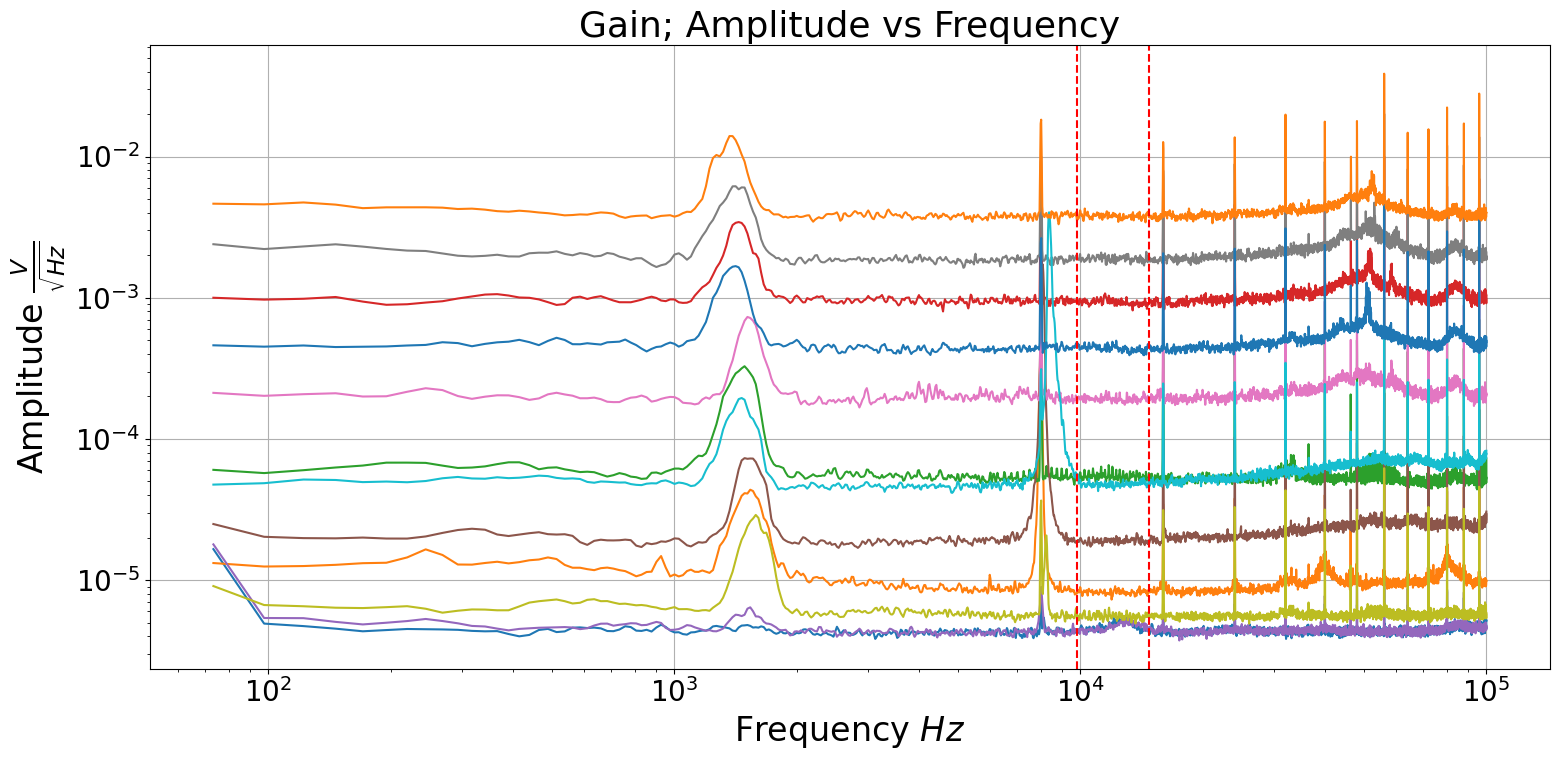

Ch1 white noise: 5.2276898e-05
Ch2 white noise: 0.0037920174500000003


In [26]:
# ch1 was put in high mode
skip = 3
data_header = 'Gain'
#data_header = data_headers[0] 
title = data_header
#title = f'High mode, Res BW: 24.41 kHz'
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]
            
            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]
            
            white_noise_index1 = 400
            white_noise_index2 = 600
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]
            
            white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])
            print(f'Ch2 {data_header}{label_part}: {white_noise2 }')

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise1': white_noise1,
                'white_noise2': white_noise2
            })

#entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    #line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'gain')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--', label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--', label=f"f2: {white_noise_freq2}")
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{V}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
#plt.legend()

plt.tight_layout()
plt.show()

print(f'Ch1 white noise: {white_noise1}')
print(f'Ch2 white noise: {white_noise2}')